In [54]:
import pandas as pd
embedding_df = pd.read_pickle("user_embeddings")

house_df = pd.read_csv('../../data/congress_twitter_117th_house.csv', sep=',', header=0)

# keep their user name as ID, and also keep "State", and "Party" columns
house_df["user_name"] = house_df["Link"].str.replace("https://twitter.com/", "", regex=False)
house_df = house_df[["user_name", "State", "Party"]].copy()

senate_df = pd.read_csv('../../data/congress_twitter_117th_senate.csv', sep=',', header=0)

# keep their user name as ID, and also keep "State", and "Party" columns
senate_df["user_name"] = senate_df["Link"].str.replace("https://twitter.com/", "", regex=False)
senate_df = senate_df.rename(columns={"Party ": "Party"})
senate_df = senate_df[["user_name", "State", "Party"]].copy()

In [55]:
full_df = pd.concat([house_df, senate_df])
embedding_df = embedding_df.merge(full_df, on="user_name")

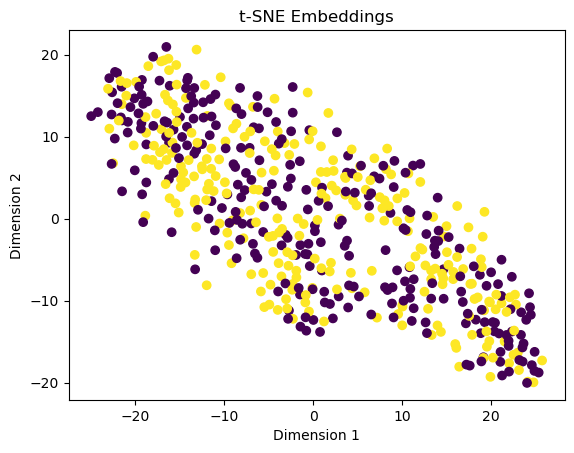

In [56]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Concatenate the embeddings into a single array
embeddings = np.stack(embedding_df["embedding"].values).squeeze()

# Generate the t-SNE embeddings
tsne_embeddings = TSNE(n_components=2, init='random', learning_rate=200.0).fit_transform(embeddings)

# Plot the t-SNE embeddings
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c = embedding_df["Party"] == "R")
plt.title('t-SNE Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
